# Natural language processing

Natural language processing (NLP) is a machine learning technique to do analyze large amounts of text to extract information. Some examples are sentiment analysis, translation, summarizing, tagging, but NLP is a very broad term.

It's a hard task since language is a very ill-defined thing. For example,
* Verbs can sometimes be nouns (make, set)
* Words that are spelled the same can have different meanings (spot=stain/availability, fall=season/drop).
* Idoms (hot potato, piece of cake)

Try explaining all of that to a computer!

## Sentiment analysis
When are studying a controversial topic, often people have opinions. From online discourse, you can gleen a lot of information, but it requires reading every post to see if people feel positive or negative about it. NLP can help with this. Using the Natural Language Toolkit (NLTK).

Yelp provides a free data set that has a big chunk of their business reviews with over 6 million reviews. This is an excellent dataset for sentiment analysis.

https://www.yelp.com/dataset

In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import json
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd

The format of the data is in JSONL format which is just a text file with lots of JSON records with one JSON record on each line. JSON in turn is a markup language that is great at representing unstructured data in a textual format. Python has the JSON library to deal with that, lets read the first business.

In [4]:
with open('/tmp/yelp/yelp_academic_dataset_business.json') as f:
    for line in f:
        business = json.loads(line)
        print(business)
        break

{'business_id': 'Pns2l4eNsfO8kk83dixA6A', 'name': 'Abby Rappoport, LAC, CMQ', 'address': '1616 Chapala St, Ste 2', 'city': 'Santa Barbara', 'state': 'CA', 'postal_code': '93101', 'latitude': 34.4266787, 'longitude': -119.7111968, 'stars': 5.0, 'review_count': 7, 'is_open': 0, 'attributes': {'ByAppointmentOnly': 'True'}, 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists', 'hours': None}


So our first business is Abby Rappoport. Let's find the reviews that go with that business.

In [5]:
reviews = []
with open('/tmp/yelp/yelp_academic_dataset_review.json') as f:
    for line in f:
        review = json.loads(line)
        if review['business_id'] == business['business_id']:
            reviews.append(review)

In [6]:
len(reviews)

7

We have 7 reviews.

In [7]:
reviews

[{'review_id': '9vwYDBVI3ymdqcyJ5WW2Tg',
  'user_id': 'e0imecnX_9MtLnS2rUZM-A',
  'business_id': 'Pns2l4eNsfO8kk83dixA6A',
  'stars': 5.0,
  'useful': 3,
  'funny': 2,
  'cool': 1,
  'text': "I've had acupuncture treatments with Abby over the past few years and I really can't say enough about how great my experiences have been.\n\nShe has successfully treated me for everything from stress to colds to menstrual cramps.  I was amazed that her medical qi gong treatments helped alleviate my chronic back pain.  I didn't think anything could help with that!  \n\nShe is always very clear and upfront about treatments and expectations.   And I love that she always has great advice on herbs, supplements and natural remedies.\n\nShe just relocated to Los Gatos and I'm definitely going to miss having her in San Francisco!",
  'date': '2012-05-02 18:07:38'},
 {'review_id': 'OXgg1LdxHDv3CBU5-xi2lA',
  'user_id': '_Q0fdLVoTnlNkEypUvNkHA',
  'business_id': 'Pns2l4eNsfO8kk83dixA6A',
  'stars': 5.0,
  '

One nice thing to visualize reviews (or other texts) is by creating a wordcloud.

For that, we first need to merge all of the reviews into one big text.

In [8]:
reviewtext = "\n".join([review['text'] for review in reviews])

Then create the wordcloud thanks to the wordcloud package and just plot it.

In [9]:
cloud = wordcloud.WordCloud(background_color='white').generate(reviewtext)

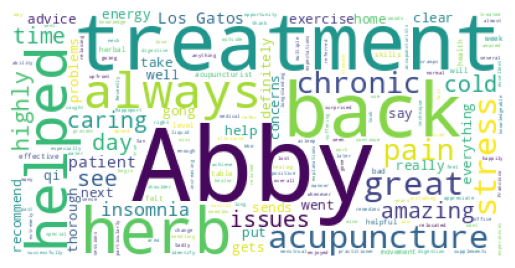

In [10]:
plt.axis('off')
plt.imshow(cloud)

That shows at a glance what this business is about. You can see that Abby features prominently of course, but you also see that this is a place that does acupuncutre and treatments and especially for back pain.

To see if a business is good or not, we can use the stars that people usually give with a review, but this is not always very accurate. People can be very positive in their review but still no give five stars or people can be a bit unhappy and straight go to one star. To get a better idea of a business, you'd generally read the actual reviews.

However, if you have lots of businesses and reviews, that will become very time consuming! So it's better to have a computer to do this. Of course, NLP is hard because language is such an ambiguous thing as mentioned earlier.

Enter machine learning! NLTK has a bunch of pretrained models. One of them is VADER which is good for short texts or sentences. The `SentimentIntensityAnalyzer` will use this model to analyze the reviews.

We first need to download it, but NLTK has a function for that.

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jvanderk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Then create the analyzer

In [12]:
sia = SentimentIntensityAnalyzer()

Let's see what it thinks of the first review

In [13]:
sia.polarity_scores(reviews[0]['text'])

{'neg': 0.061, 'neu': 0.699, 'pos': 0.24, 'compound': 0.9735}

The number to look for here is compound which combines that negativity, positivity, and neutrality in one easily understandable score that ranges from -1 (BAD!) to 1 (GREAT!).

So in this case, the first review is very close to 1. This must be a very positive review. Let's see what it was.

In [14]:
print(reviews[0]['text'])

I've had acupuncture treatments with Abby over the past few years and I really can't say enough about how great my experiences have been.

She has successfully treated me for everything from stress to colds to menstrual cramps.  I was amazed that her medical qi gong treatments helped alleviate my chronic back pain.  I didn't think anything could help with that!  

She is always very clear and upfront about treatments and expectations.   And I love that she always has great advice on herbs, supplements and natural remedies.

She just relocated to Los Gatos and I'm definitely going to miss having her in San Francisco!


And indeed, that was a very positive review. Let's look at all the reviews now.

In [15]:
for i, review in enumerate(reviews):
    print(i, ':', sia.polarity_scores(review['text'])['compound'])

0 : 0.9735
1 : 0.4304
2 : 0.9573
3 : 0.974
4 : 0.9079
5 : -0.5859
6 : 0.9391


There is one review with index 5 that is pretty negative. Let's see what that is about.

In [16]:
print(reviews[5]['text'])

Abby Rappoport helped me achieve a long lost sense of health. I was suffering from debilitating insomnia due to a very stressful job and family requirements. She also was able to get me through a bad bout of bronchitis. 
She is professional, thorough and clearly seasoned as a healthcare provider.
I highly recommend Abby if your situation needs caring attention.


So this was actually a positive review for Abby. However, the language itself is clearly very negative, "stress", "debilitating", "bad bout", etc. That shows that this model isn't always correct. It is however often good enough.

## Seniment training

Yelp reviews also have a score for funny, useful, and cool. So we could train our own model to recognize those sentiments. Let's have a look at the reviews ith very high funny scores first.

Lets use Pandas for easier data handling. It can read JSONL quite easily. It does howeber load everything in memory and since we have almost 7 million reviews that ould quickly exhaust the memory, so I'll limit it to just 300,000.

In [3]:
reviews = pd.read_json('/tmp/yelp/yelp_academic_dataset_review.json', lines=True, nrows=300000)

In [9]:
funny = reviews[reviews['funny'] > 100]
funny

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
261468,Kv85KuFwuuKp7LCKCCm2-g,xp4BcnaxYWh1cyIsy6Zn5Q,LbhHgTK94bFKIq4owlS9NA,4,13,222,0,My experience with Tower Place has been relati...,2013-11-08 02:11:53
269621,JQ47GqjtxgNeYblLf9VG_A,Hak3d3B6W-A7sAr2832URA,LbhHgTK94bFKIq4owlS9NA,5,2,284,0,"Absolutely stunning, beautiful property!! Ever...",2014-05-18 15:21:01


In [14]:
print(funny.iloc[0]['text'])

My experience with Tower Place has been relatively good so far. I moved here in August and have had no major complaints. The location is great; it's right on a subway stop, not far from center city, and surrounded by a few great Fairmount restaurants. The apartment itself is nice, with an abundance of natural light from the large windows. However, the apartments do lack a few things that one would think a "luxury" apartment would certainly master. Hot water has been an issue lately, either they are turning it off to fix something in the water system or it seems to not be working for an unknown reason. The air circulation is poor, with very little air ever reaching the bedrooms. There are no overhead light fixtures, which is only an issue at nighttime due to the natural light during the day. The water pressure in general is poor in the bathrooms and the kitchen. But even though these issues are real and annoying, they are not deal breakers for me. The apartments are spacious and with gr

In [15]:
print(funny.iloc[1]['text'])

Absolutely stunning, beautiful property!! Ever since the new management has come on board there have been so many positive changes being made! The front desk is always helpful,smiling and welcoming. There's a nice outdoor area (fenced in and only for tenants) that is going to be beautifully landscaped, and there's been some really cool outdoor furniture and firepits added to the courtyard. A night under the stars around a fire in the heart of center city?! Yes please. The building is also dog friendly, which is a huge plus. The building hosts a breathtaking view of philadelphia, large windows in each unit providing lots of sunlight by day and a philly skyline nightlight to fall asleep to at night :) amenities include a sheek 17th floor lounge room with couches, flat screens and space to entertain groups (also with huge windows and view of the city!) and has a very Mad Men mod feel to the room. Also included in the building is a gym, yoga studio, game room complete with foos ball, hocke

While these are well-written reviews, they are not exactly funny.

# Resources
https://realpython.com/python-nltk-sentiment-analysis/